<a href="https://colab.research.google.com/github/jose-alves-fn/AdaBoost/blob/main/GEIA_2025_Aprendizado_de_M%C3%A1quina_Avan%C3%A7ado_Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GEIA 2025 - Aprendizado de Máquina Avançado - Adaboost**

### **Leitura**

In [39]:
import pandas as pd

In [40]:
dados = pd.read_csv('/content/marketing_investimento.csv')
dados.head(8)

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
5,24,solteiro (a),medio,nao,174,sim,487,1,sim
6,53,casado (a),superior,nao,4446,nao,429,1,nao
7,30,casado (a),medio,nao,946,nao,1065,1,nao


### **Verificando dados (info)**

In [41]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


In [42]:
dados.describe()

,idade,saldo,tempo_ult_contato,numero_contatos
count,1268.000000,1268.000000,1268.000000,1268.000000
mean,41.376972,1443.426656,367.574921,2.715300
std,11.383805,2690.406767,347.969723,2.885642
min,19.000000,-1206.000000,5.000000,1.000000
25%,33.000000,91.250000,134.000000,1.000000
50%,39.000000,491.500000,251.000000,2.000000
75%,49.000000,1623.500000,488.250000,3.000000
max,87.000000,27069.000000,3025.000000,32.000000


### **Definindo o conjunto de dados**

In [43]:
# Separando (criando cópias)
x = dados.drop('aderencia_investimento', axis = 1)
y = dados['aderencia_investimento']

print(x.shape)
print(y.shape)

(1268, 8)
(1268,)


### **Tranformando variáveis (explicativas) categóricas via one hot enconding**

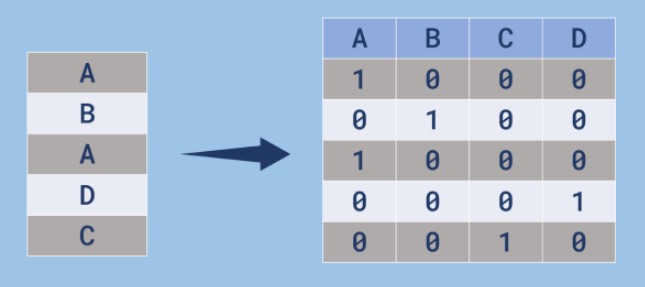

A forma ideal de fazer esse tipo de transformação, que mantém a informação original, é conhecida como one hot encoding. Essa ação transforma cada uma das classes das variáveis categóricas em novas colunas, utilizando o valor 0 para representar a ausência da característica e 1 para a presença da característica na amostra da base de dados.

https://www.alura.com.br/artigos/get-dummies-vs-onehotencoder-qual-metodo-escolher


In [44]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

🧩 **O que o make_column_transformer faz?**

Ele permite aplicar diferentes transformações em diferentes colunas de um dataset, de forma organizada.

- Aplica OneHotEncoder nas colunas categóricas

- Aplica StandardScaler nas colunas numéricas

- E mantém o restante das colunas como estão (por causa do remainder='passthrough')

Ou seja, ele facilita o pré-processamento de colunas mistas (numéricas + categóricas) sem precisar fazer isso manualmente.

🔍 **O que o OneHotEncoder faz?**

O OneHotEncoder transforma variáveis categóricas em vetores numéricos binários, que podem ser usados por algoritmos de machine learning. Por exemplo:

coluna "estado_civil":
['solteiro', 'casado', 'divorciado']

**O OneHotEncoder transforma isso em algo assim**:

> [1, 0, 0]  # solteiro

> [0, 1, 0]  # casado

> [0, 0, 1]  # divorciado

Cada categoria vira uma nova coluna binária (0 ou 1). Isso é necessário porque muitos modelos não trabalham bem com texto ou categorias como strings.

**Resumo**

|Componente|Função principal|
|---|---|
|make_column_transformer|Aplica transformações diferentes em colunas específicas|
|OneHotEncoder|Codifica variáveis categóricas como colunas binárias|


______________________________

In [45]:
# Capturando as colunas para uso depois (todas do dataframe)
colunas = x.columns

In [46]:
# Verificando
print(pd.DataFrame(colunas)[0].tolist())

['idade', 'estado_civil', 'escolaridade', 'inadimplencia', 'saldo', 'fez_emprestimo', 'tempo_ult_contato', 'numero_contatos']


In [47]:
# Escolhendo as colunas e já aplicando o método sob as colunas com valores categóricos
# Caso a coluna (campo) tenha duas categorias, será mantida somente uma subdivisão, com valores 0 e 1
one_hot = make_column_transformer((
                      OneHotEncoder(drop = 'if_binary'),
                      ['estado_civil','escolaridade','inadimplencia','fez_emprestimo']
), remainder = 'passthrough',
  sparse_threshold=0) # Parametro necessário para não 'perder' dados (não economizar memória). Forçar uma matriz densa.

In [48]:
# Necessário agora fazer o fit dos dados novamente, usando o que foi transformado pelo OneHotEnconder
x = one_hot.fit_transform(x)

In [49]:
# Resgatando os nomes das colunas, para aplicação nas novas colunas
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

🔍 **O que faz o LaberEncoder?**

________________________________________

O LabelEncoder é útil para variáveis alvo (y) em classificações — por exemplo, transformar 'sim' e 'não' em 1 e 0.

🚫 Mas não é recomendado usar o LabelEncoder em colunas de entrada (X) para algoritmos como regressão, árvore, etc., porque ele atribui um valor ordinal (números com ordem), mesmo que as categorias não tenham uma ordem real. Isso pode induzir o modelo ao erro.

________________________________________

*Suponha que você tenha uma coluna com valores de uma categoria, como por exemplo:*

> ['solteiro', 'casado', 'divorciado', 'solteiro']

*Ao aplicar o LabelEncoder, ele vai atribuir um número inteiro para cada valor único, assim:*

> casado      → 0  
> divorciado  → 1  
> solteiro    → 2

*Então a transformação fica:*

> [2, 0, 1, 2]

____________________________________

✅ Quando usar LabelEncoder então?

|Situação|Usar LabelEncoder?|
|---|---|
|Codificar variável alvo (y)|✅ Sim|
|Coluna categórica de entrada (X)|⚠️ Cuidado! Prefira OneHotEncoder|
|Classe de saída de uma classificação|✅ Sim|

________________________________________

In [50]:
from sklearn.preprocessing import LabelEncoder

# Criando o objeto
label_encoder = LabelEncoder()

In [51]:
# Novo fit
y = label_encoder.fit_transform(y)
y

array([1, 1, 0, ..., 1, 1, 1])

### **Conceito do AdaBoost**

#### **Base conceitual do algoritmo de AdaBoost**



_O AdaBoost treina uma sequência de classificadores fracos (stumps), em que cada um tenta minimizar o erro ponderado da iteração atual. A cada rodada, os exemplos mal classificados têm seus pesos aumentados, forçando os próximos classificadores a prestar mais atenção neles. O objetivo é que, ao combinar vários classificadores fracos, o modelo final alcance alta acurácia._

_________________________________

**Pontos importantes para a compreensão do funcionamento do algoritmo:**

1️⃣ AdaBoost é um algoritmo de aprendizado por reforço (boosting) que constrói uma sequência de estimadores fracos, como stumps (tocos), com o objetivo de formar um modelo mais forte e preciso.

- Embora o termo “floresta” (de stumps) possa ajudar na intuição, não se trata de uma Random Forest tradicional, pois os **estimadores não são independentes** nem treinados em subconjuntos aleatórios dos dados.
- Um **stump** é uma árvore de decisão binária de profundidade 1, ou seja, realiza apenas uma divisão (split).
- É considerado um modelo fraco porque **sozinho não tem alta capacidade** de acerto, mas é útil como base para o AdaBoost.

2️⃣ No AdaBoost, os estimadores são dependentes entre si.

- Cada stump é treinado com base nos **erros cometidos pelo stump anterior**.
- O algoritmo **ajusta o foco** para os exemplos classificados incorretamente nas iterações anteriores.
- Isso faz com que os estimadores seguintes tentem **corrigir os erros dos anteriores**.

3️⃣ Durante o processo de treinamento, cada exemplo do conjunto de dados recebe um peso.

- Inicialmente, todos os **pesos são iguais**.
- A cada nova iteração, os **pesos são ajustados**: os exemplos que foram classificados incorretamente ganham maior peso, enquanto os exemplos classificados corretamente têm seus pesos reduzidos.
- Isso força os próximos estimadores a **dar mais atenção** aos casos difíceis.

4️⃣ Cada stump gera um erro ponderado com base nos pesos das amostras, e esse erro é usado para calcular um fator de importância (α).

- Esse fator define o quanto aquele stump vai **influenciar** na predição final.
- Estimadores com **menor erro ganham maior peso** na votação final do ensemble. Esse peso, também chamado de **fator de importância** (α), é calculado com base em uma função logarítmica do erro ponderado do stump.

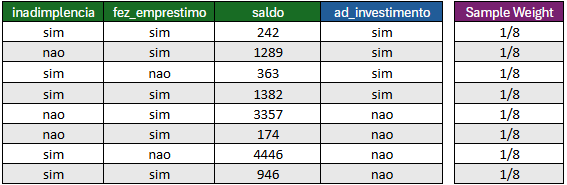

- **Inicialmente** todas as amostras possuem o mesmo peso, num dataset com 8 amostras, temos que 1/8;
- Dessa forma todas as amostras tem a mesma **importância**;
- Após a criação do **primeiro** *stump*, os pesos das amostras serão **alterados**;
- Isso ocorre porque é preciso guiar a **criação do próximo** *stump*;

####**Stump (toco)**

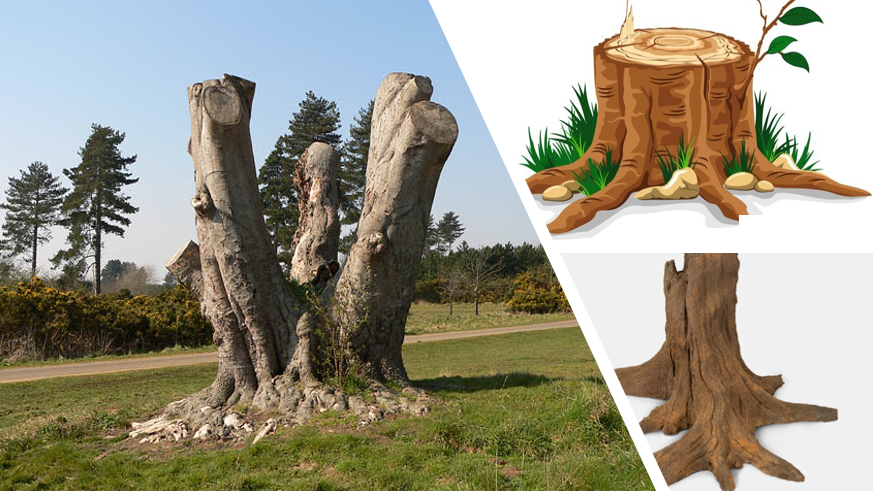

####**Definindo o primeiro *stump***

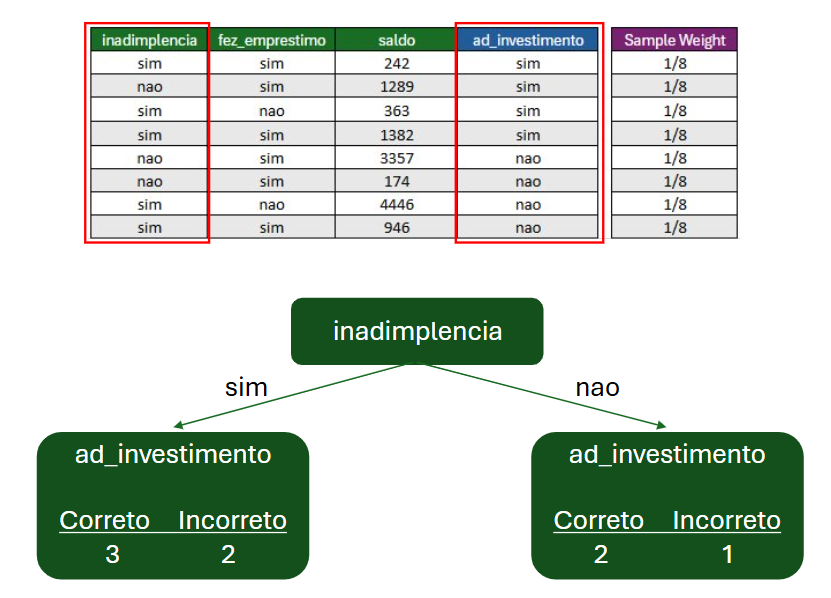

- Para todas as features do dataset, será feito um experimento para avaliar qual delas, **inicialmente, melhor define os alvos** por meio de uma stump tree;
- No caso da figura acima, o exemplo está avaliando a feature inadimplencia, e percebeu que **há 3 erros nas amostras**;
- Além dos erros, ainda é necessário utilizar uma **métrica de impureza**, que no nosso exemplo será *Gini*, avaliando como as classificações corretas se distribuem dentro das folhas (nós).

####**Cálculo do Gini**

Este índice informa o grau de heterogeneidade dos dados. Seu objetivo é medir a frequência de um elemento aleatório de um nó ser rotulado de maneira incorreta. Em outros termos, esse índice quantifica e determina a impureza de um nó por meio do seguinte cálculo:

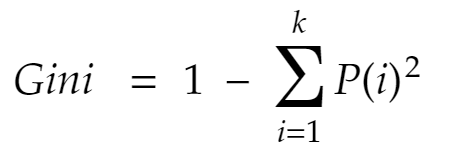

Onde:

- P(i) representa a frequência relativa das classes em cada um dos nós;
- k é o número de classes.
Se o índice Gini for igual a 0, isso indica que o nó é puro. No entanto, se o valor dele se aproxima mais do valor 1, o nó é impuro.


> **IMPORTANTE:** no caso das stump trees será necessário **ponderar** no cálculo de Gini, uma vez que cada nó carrega uma métrica associada. Sendo necessário calcular primeiramente em cada nó para depois conseguir a medida ponderada.


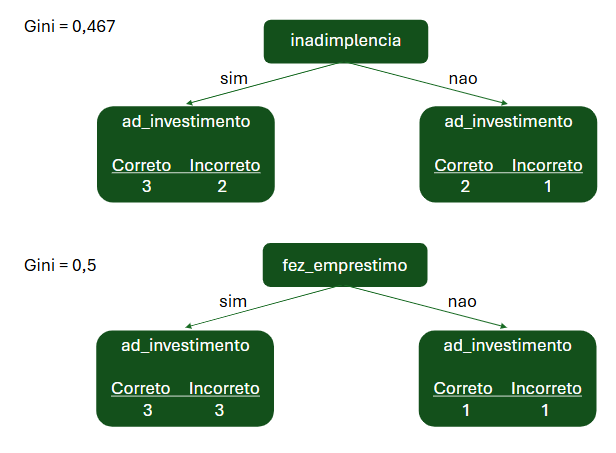

- A feature com Gini mais próximo a 0 deverá ser a escolhida para o primeiro stump;
- O algoritimo vai realizar esse procedimento como forma de ter o melhor início possível, visto que de imediato, todas as amostras tem o mesmo peso.

####**Conceito sobre pesos dos estimadores (stump trees)**

**Sample Weights (Pesos das Amostras)**

- No AdaBoost, cada amostra (exemplo de treinamento) recebe um peso inicial igual para todas (ex.: 1/N, onde N é o número total de amostras);

- Após cada stump (árvore curta) ser treinada, os pesos das amostras são **ajustados**:

- Amostras classificadas **incorretamente**: Ganham pesos maiores na próxima iteração.

- Amostras classificadas **corretamente**: Ganham pesos menores.

- Isso força a próxima stump a **focar mais nas amostras que foram difíceis** de classificar anteriormente.




####**Amount of Say e processo de atualização de pesos das amostras**

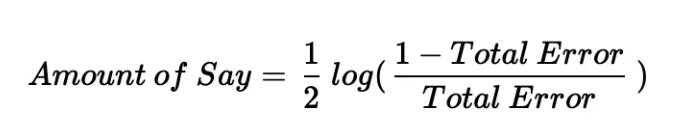

- Cada stump tem um peso chamado **"Amount of Say" (ou α)**, que define sua importância no modelo final;

- O peso é calculado pela fórmula acima;

- Se uma stump tem **baixo erro** (classifica bem as amostras difíceis), ela recebe um α alto (**mais influência**).

- Se uma stump tem **alto erro**, ela recebe um α baixo (**menos influência**).

**Ex.: um estimador inicial errou 1 amostra e acertou 7:**

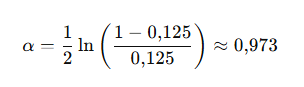

**Atribuindo novos pesos as amostras**

Agora os pesos das amostras serão ajustados para a próxima iteração:

- As amostras que o estimador acertou terão seu peso diminuído.

- A amostra que ele errou terá seu peso aumentado, para que o próximo estimador foque nela.

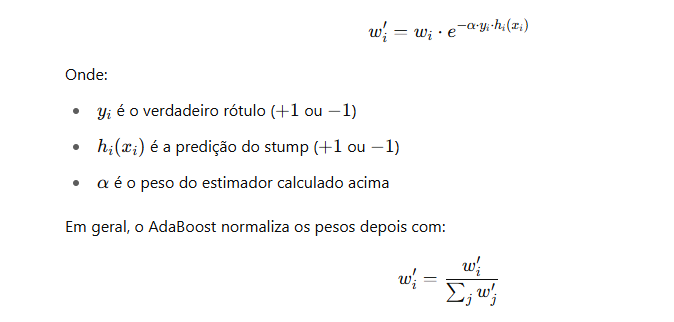

**Aplicando a fórmula do ajuste de pesos**

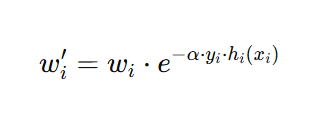

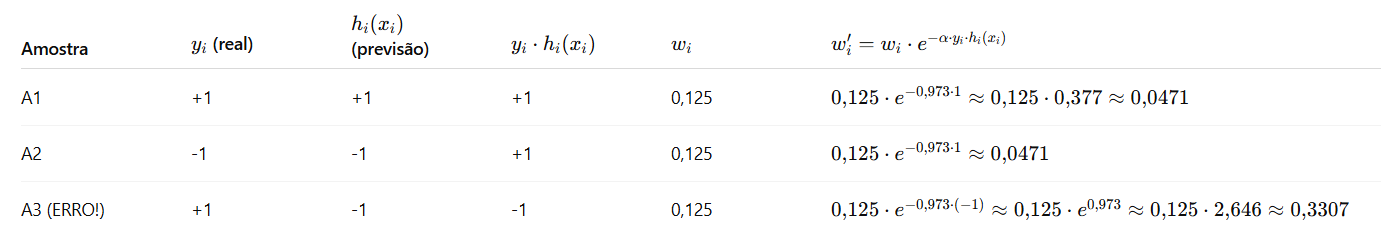

In [ ]:
import numpy as np

# Parâmetros de entrada
erro = 1 / 8                      # erro do classificador fraco
w_i = 0.125                       # peso inicial da amostra
y_i = 1                           # classe verdadeira da amostra
h_xi_acerto = 1                   # predição do classificador (pode ser -1 ou 1)
h_xi_erro = -1                    # predição do classificador (pode ser -1 ou 1)

# 1. Cálculo do amount of say (alpha)
alpha = 0.5 * np.log((1 - erro) / erro)
print("Amount of Say (alpha):", alpha)

# 2. Atualização do peso da amostra (quando acertado)
w_i_novo_acerto = w_i * np.exp(-alpha * y_i * h_xi_acerto)
print("Novo peso quando acertado (não normalizado):", w_i_novo_acerto)

# 2. Atualização do peso da amostra (quando errado)
w_i_novo_erro = w_i * np.exp(-alpha * y_i * h_xi_erro)
print("Novo peso quando errado (não normalizado):", w_i_novo_erro)



Amount of Say (alpha): 0.9729550745276566
Novo peso quando acertado (não normalizado): 0.04724555912615341
Novo peso quando errado (não normalizado): 0.3307189138830738


**Normalizando as amostras para o Segundo stump**

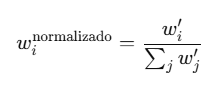

In [ ]:
import numpy as np

# Dados simulados (8 amostras)
y = np.array([1, -1, 1, -1, 1, -1, 1, -1])              # rótulos verdadeiros
h = np.array([1, -1, 1, -1, 1, -1, -1, -1])             # predições do stump (1 erro na sétima posição)
w = np.full(8, 1/8)                                     # pesos iniciais iguais

# Cálculo do alpha (amount of say)
erro = 1 / 8
alpha = 0.5 * np.log((1 - erro) / erro)
print("Alpha:", alpha)

# Atualização dos pesos (não normalizados)
w_novo = w * np.exp(-alpha * y * h)
print("Pesos atualizados (não normalizados):", w_novo)

# Normalização
w_normalizado = w_novo / np.sum(w_novo)
print("Pesos normalizados:", w_normalizado)


Alpha: 0.9729550745276566
Pesos atualizados (não normalizados): [0.04724556 0.04724556 0.04724556 0.04724556 0.04724556 0.04724556
 0.33071891 0.04724556]
Pesos normalizados: [0.07142857 0.07142857 0.07142857 0.07142857 0.07142857 0.07142857
 0.5        0.07142857]


In [ ]:
# Cálculo na mão do peso normalizado da amostra errada
peso_normalizado_amostra_errada = 0.330718 / ((7 * 0.04724) + 0.330718)
print(peso_normalizado_amostra_errada)

0.5000287270297159


In [ ]:
# Cálculo na mão do peso normalizado das amostras corretas
peso_normalizado_amostras_corretas = 0.04724 / ((7 * 0.04724) + 0.330718)
print(peso_normalizado_amostras_corretas)

0.07142446756718346


In [ ]:
# Somando
recalibragem_amostras = (peso_normalizado_amostras_corretas * 7) + peso_normalizado_amostra_errada
print(recalibragem_amostras)

1.0


**Observação! A importância do *Amount of Say***
________________________________

- Quanto maior o valor do Amount of Say (α), mais influência o estimador terá na atualização dos pesos das amostras para a próxima iteração do stump;

- Isso significa que estimadores que cometeram mais erros terão um Amount of Say menor, o que reduz sua influência na reponderação das amostras;

- Literalmente, o Amount of Say é o expoente na fórmula de atualização dos pesos!

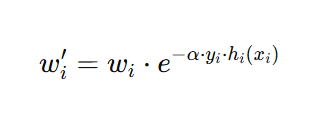


**Tabela com atualização e normalização dos pesos das amostras**

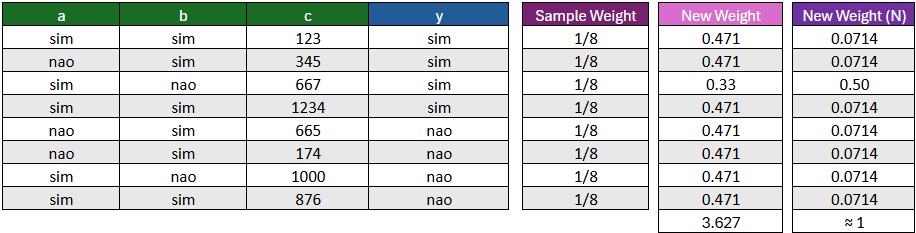

#### **Reorganizando os dados**

*Depois que o primeiro stump foi treinado e os pesos das amostras foram recalculados, o algoritmo agora quer criar um novo conjunto de dados (com o mesmo tamanho do original), mas de uma forma inteligente:*

- Ele vai sortear amostras aleatoriamente, mas com maior chance de selecionar as que têm maior peso.

- Isso serve para focar o aprendizado nos exemplos que foram mal classificados.

________________________________________

**Passo a passo da reamostragem ponderada:**

1️⃣**Cria-se uma distribuição cumulativa dos pesos:**

|Cumulativo c/ inicio|Resultante|Intervalo (bin)|Observação
|---|---|---|---|
|0.00 + 0.07|0.07|entre 0.00 e 0.07|
|0.07 + 0.07|0.14|entre 0.07 e 0.14|
|0.14 + 0.07|0.21|entre 0.14 e 0.21|
|0.21 + 0.50|0.71|entre 0.21 e 0.71|Maior chance de ser selecionado para o novo dataset
|0.71 + 0.07|0.78|entre 0.71 e 0.78|
|0.78 + 0.07|0.85|entre 0.78 e 0.85|
|0.85 + 0.07|0.92|entre 0.85 e 0.92|
|0.92 + 0.07|1.00|entre 0.92 e 1.00|


> *Obs.: o número de bins é referente ao número de amostras do dataset. Isso pode ser custoso computacionamente em datasets extensos. No exemplo temos 8 amostras e portanto, 8 intervalos*
______________________

2️⃣ **Sorteia-se um número aleatório entre 0 e 1, ex: 0.66;**
______________________

3️⃣ **Verifica-se onde esse número cai na distribuição:**

- O 0.66 está entre 0.21 e 0.71 → então ele caiu na amostra 4 (aquela com peso 0.50);
______________________

4️⃣ **Inclui-se essa amostra 4 no novo dataset;**
______________________

5️⃣ **Repete o processo N vezes (onde N é o tamanho do dataset original):**

- Isso pode fazer com que algumas amostras se repitam (porque é com reposição).

- Algumas amostras com peso baixo podem nem aparecer.
______________________


🔄 **Por que isso é feito?**

- Para reforçar os exemplos difíceis na próxima rodada de aprendizado.

- Isso garante que os novos stumps vão focar mais nos casos difíceis, que os anteriores erraram.

- É uma técnica de amostragem estocástica guiada pelos pesos.
______________________

✅ **Resultado final**

- Você acaba com um novo dataset de mesmo tamanho, mas com amostras "repetidas" ou "ignoradas" de acordo com os pesos.

- Esse novo conjunto será usado para treinar o segundo stump. Os pesos são "resetados".



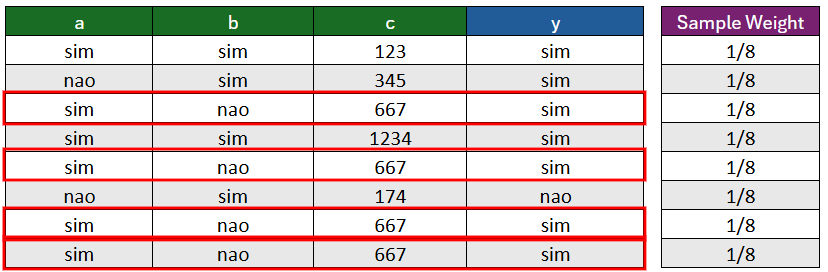

**Para o novo stump**

- Cada stump é treinado do zero em um novo dataset construído com as amostras reamostradas (com reposição);

- Mesmo que uma mesma amostra apareça 4 vezes, ela é tratada como 4 amostras distintas com os mesmos dados;

- O stump, ao construir sua árvore, vê essas duplicações como uma maior ênfase naquele ponto de dados.

> *A repetição das amostras já embute o peso que elas tinham — não é mais necessário manter os pesos explícitos nesse momento.*

#### **Classificação no AdaBoost**

O Adaboost realiza sua predição final baseando-se sinal da soma ponderada das predições.

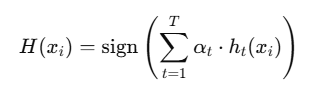

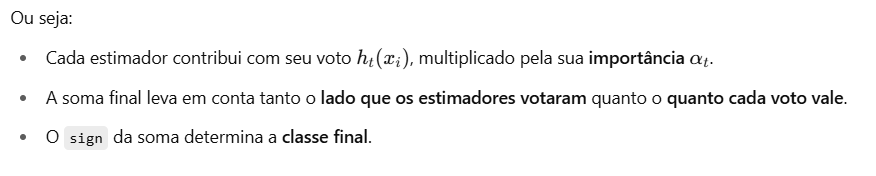

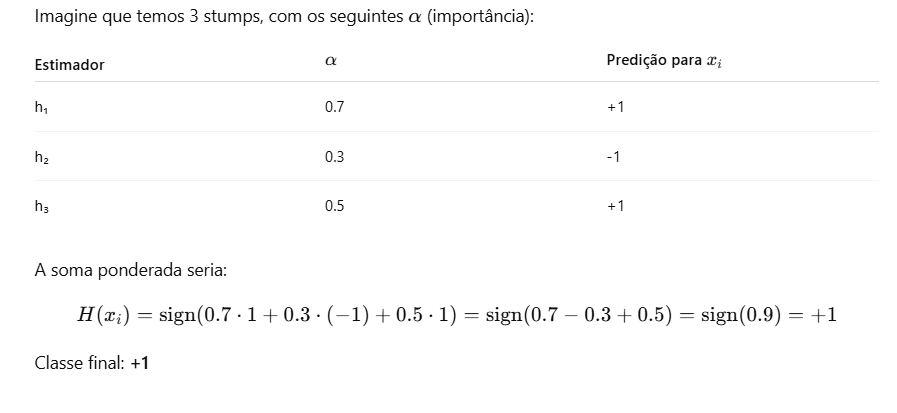

**Outra forma de visualizar**

- Somar os valores de importância (Amount of Say) de cada estimador.

- Comparar as somas ao final e verificar qual tem mais "peso".

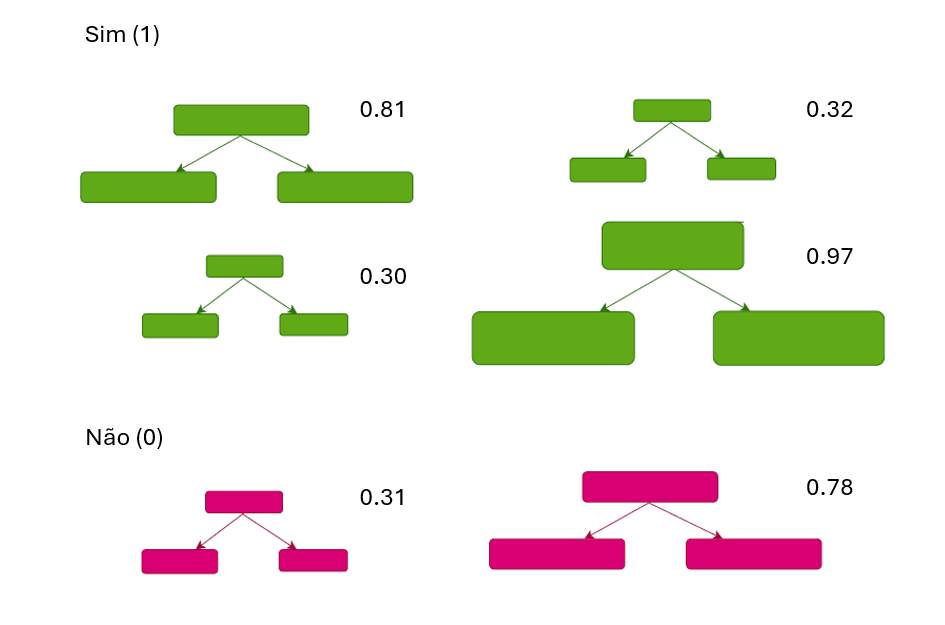

**Exemplo: temos 6 stumps, e para uma amostra específica, eles retornaram:**

4 previram "sim" (classe 1) com importâncias: 0.81, 0.32, 0.31, 0.97
- Soma: 2.40

2 previram "não" (classe 0) com importâncias: 0.31, 0.78
- Soma: 1.09

-------------------------------------------

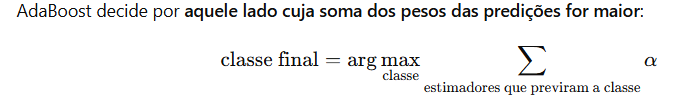

> **Dessa forma:**

> Classe 1 (sim): 2.40

> Classe 0 (não): 1.09

- **Classe final = 1 (sim)**

- Estimadores mais confiáveis têm mais influência.
(alpha alto = voto mais forte)

- Estimadores fracos (alpha baixo) têm voto mais leve, mesmo se forem muitos.

- Essa técnica reflete a confiança do ensemble na predição — não apenas a maioria.

### **Código do modelo**

In [52]:
# Split dos dados
from sklearn.model_selection import train_test_split

# Lembrando que stratify = y, y sendo 'yes' para manter a proporcionalidade da divisão
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y, test_size = 0.3, random_state = 5)

In [90]:
# Instanciando um classificador do AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

modelo = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=5
)

In [91]:
# Treinando
modelo.fit(x_treino, y_treino)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=5)

In [92]:
# Predição
y_pred = modelo.predict(x_teste)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Acurácia
acuracia = accuracy_score(y_teste, y_pred)
print(f'Acurácia: {acuracia * 100:.2f} %')

# Matriz de confusão
print("Matriz de Confusão:\n", confusion_matrix(y_teste, y_pred))

# Relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_teste, y_pred))


Acurácia: 73.49 %
Matriz de Confusão:
 [[175  55]
 [ 46 105]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.79      0.76      0.78       230
           1       0.66      0.70      0.68       151

    accuracy                           0.73       381
   macro avg       0.72      0.73      0.73       381
weighted avg       0.74      0.73      0.74       381



In [94]:
# Peso dos estimadores, Amount of Say
print("Pesos (amount of say) dos estimadores:")
print(modelo.estimator_weights_)

Pesos (amount of say) dos estimadores:
[1.02045905 0.69813927 0.18231542 0.43989341 0.21120125 0.141351
 0.22504059 0.3252845  0.29358009 0.30199692 0.11707802 0.32703197
 0.05917028 0.08486697 0.24450564 0.18756198 0.13631697 0.18926028
 0.08728329 0.08536703 0.14588893 0.05770805 0.05852448 0.12676333
 0.15097558 0.18636687 0.0835555  0.0820539  0.07752976 0.02991739
 0.08355058 0.05272768 0.0605291  0.12196033 0.14156977 0.09313328
 0.05031534 0.10876841 0.09057295 0.04697466 0.04589648 0.0448667
 0.08007603 0.07286805 0.0419526  0.14905157 0.20918047 0.1700409
 0.13320899 0.06333526]


### **Representação visual**

**Importância das Features**

- Plotando a importância das variáveis do dataset. Mostrando o quanto cada feature ajudou a tomar decisões ao longo das iterações.

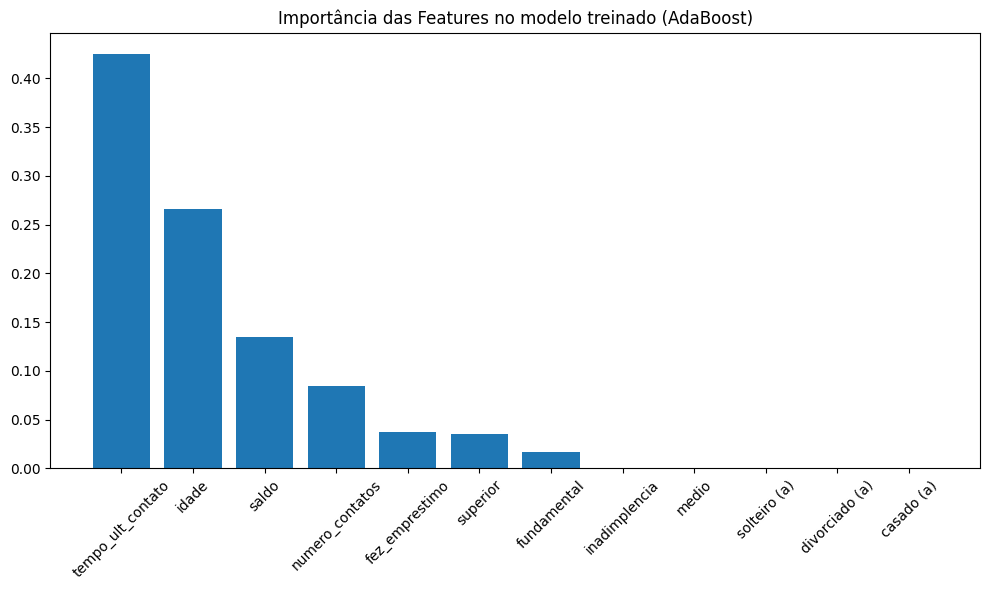

In [105]:
import matplotlib.pyplot as plt
import numpy as np

# Exemplo com sklearn
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
features = ['casado (a)',
            'divorciado (a)',
            'solteiro (a)',
            'fundamental',
            'medio',
            'superior',
            'inadimplencia',
            'fez_emprestimo',
            'idade',
            'saldo',
            'tempo_ult_contato',
            'numero_contatos'] # lista com nomes das suas features
plt.figure(figsize=(10,6))
plt.title("Importância das Features no modelo treinado (AdaBoost)")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


**Erro de treino e validação ao longo das iterações**

- Durante o treinamento, AdaBoost ajusta iterativamente modelos, e é possível ver como o erro de treino e/ou validação muda ao longo das etapas (*boosting rounds*).

- O modelo começa errando e ao longo das iterações vai apredendo com seus erros.

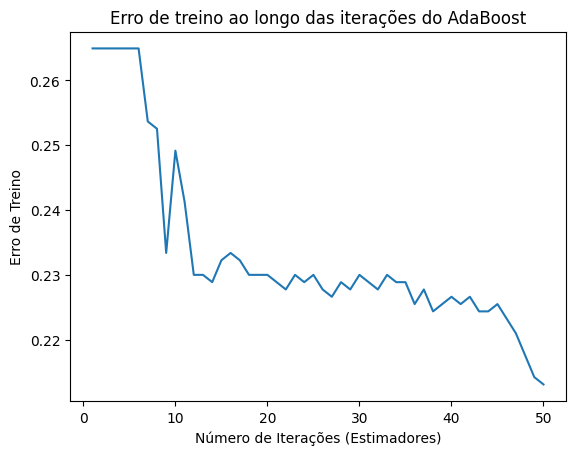

In [106]:
train_errors = []
for y_pred in modelo.staged_predict(x_treino):
    train_errors.append(1 - accuracy_score(y_treino, y_pred))

plt.plot(range(1, len(train_errors)+1), train_errors)
plt.xlabel("Número de Iterações (Estimadores)")
plt.ylabel("Erro de Treino")
plt.title("Erro de treino ao longo das iterações do AdaBoost")
plt.show()

**Visualizar os pesos dos estimadores (Amount of Say em cada iteração)**

- Visualizar melhor como a importância dos estimadores varia com as iterações do AdaBoost.

**Obs.:**

> _Os primeiros estimadores têm alto amount of say porque:_

- Estão lidando com dados "limpos" (sem ruído ou pesos desequilibrados),

- Acertam mais, e o algoritmo valoriza fortemente os estimadores com baixo erro inicial.

- Com o tempo, o foco passa a ser os "casos difíceis", e o modelo tem mais dificuldade, por isso os pesos dos próximos estimadores diminuem.

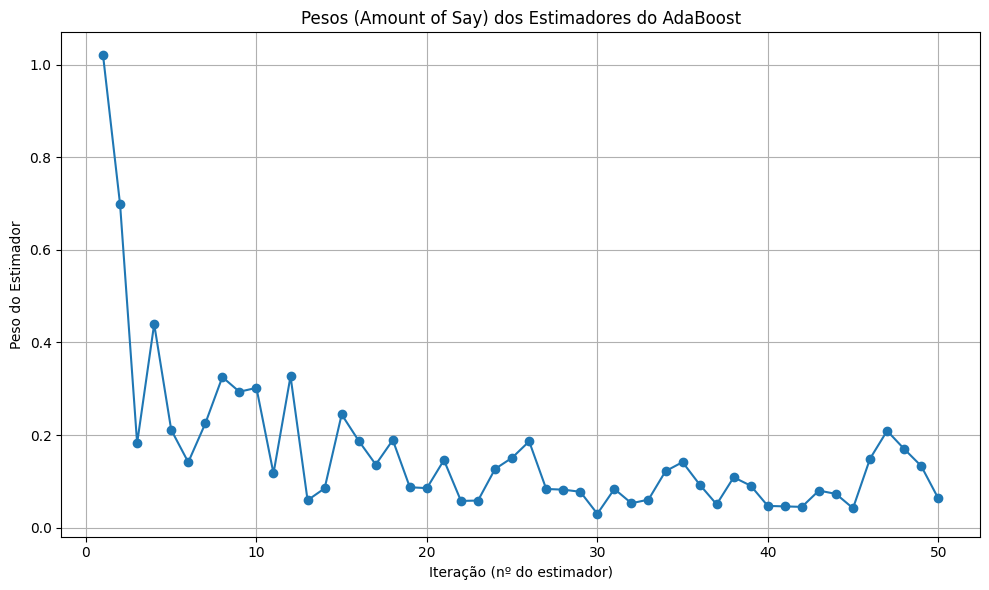

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Supondo que seja seu modelo:
pesos_estimadores = modelo.estimator_weights_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pesos_estimadores) + 1), pesos_estimadores, marker='o')
plt.title("Pesos (Amount of Say) dos Estimadores do AdaBoost")
plt.xlabel("Iteração (nº do estimador)")
plt.ylabel("Peso do Estimador")
plt.grid(True)
plt.tight_layout()
plt.show()

**4. Visualizar os classificadores fracos (estimadores) ou stumps**

- Visualizando os estimadores fracos.

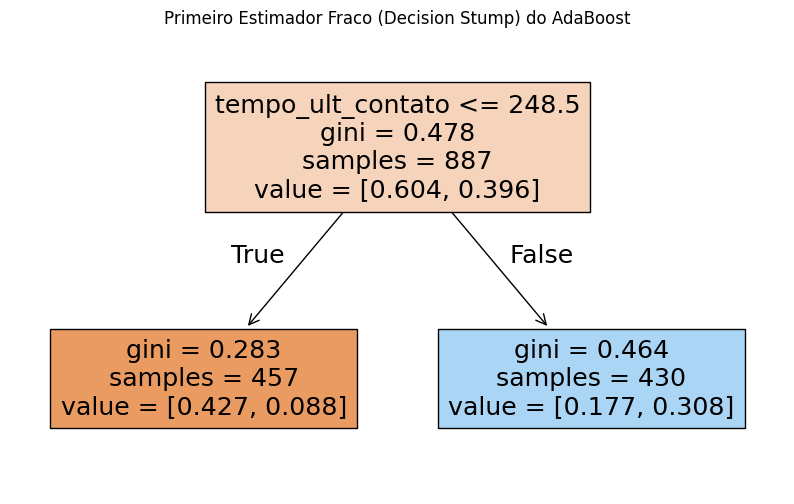

In [127]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,6))
plot_tree(modelo.estimators_[0], feature_names=['casado (a)',
            'divorciado (a)',
            'solteiro (a)',
            'fundamental',
            'medio',
            'superior',
            'inadimplencia',
            'fez_emprestimo',
            'idade',
            'saldo',
            'tempo_ult_contato',
            'numero_contatos'], filled=True)
plt.title("Primeiro Estimador Fraco (Decision Stump) do AdaBoost")
plt.show()


**Curva ROC (Receiver Operating Characteristic)**

- A curva ROC mostra a relação entre:

- Taxa de Verdadeiros Positivos (TPR) — também chamada de Recall

- Taxa de Falsos Positivos (FPR) — proporção de negativos que foram incorretamente classificados como positivos

- Para cada limiar de decisão (threshold de probabilidade de 0 a 1), calcula-se FPR e TPR, e isso forma a curva.

**Métrica associada: AUC (Area Under the Curve)**

- AUC (Área sob a curva) é um número entre 0 e 1:

1.0 = classificador perfeito

0.5 = classificador aleatório

< 0.5 = pior que aleatório (inversão das classes)

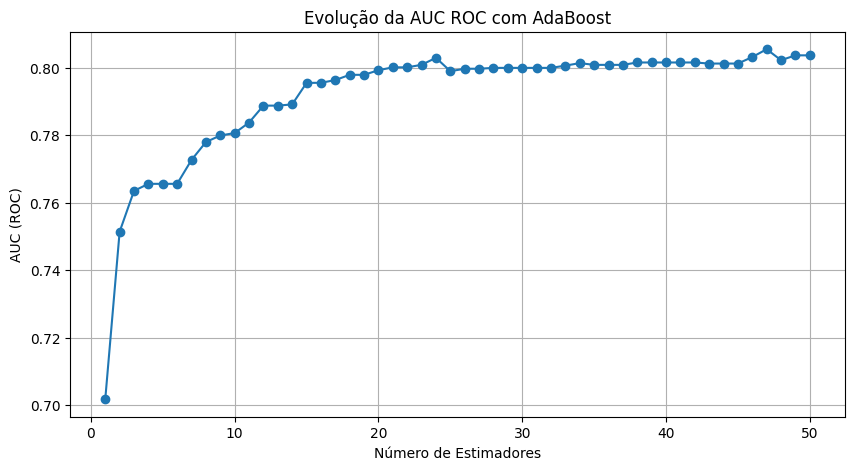

In [128]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Listas para armazenar AUC e número de estimadores
roc_aucs = []
n_estimators = []

# Percorre todas as previsões em cada estágio
for i, y_proba in enumerate(modelo.staged_predict_proba(x_teste)):
    y_score = y_proba[:, 1]  # Probabilidade da classe positiva
    auc = roc_auc_score(y_teste, y_score)
    roc_aucs.append(auc)
    n_estimators.append(i + 1)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(n_estimators, roc_aucs, marker='o')
plt.xlabel("Número de Estimadores")
plt.ylabel("AUC (ROC)")
plt.title("Evolução da AUC ROC com AdaBoost")
plt.grid(True)
plt.show()
